<a href="https://colab.research.google.com/github/Geethika2506/ML-fundamentals-2025-Geethikareddy/blob/main/Assignment_1_Geethika_Reddy_Konda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project helps to predict whether a passenger is survided in the titanic disater using machine learning.The process I follwed was EDA (exploratory data analysis) which helped me to understadn the pattterns of the data and feature engineering,encoding,feature selection and model training with optimization.(used logistic regression)

In [1971]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [1972]:

file_path = '/content/titanic3.xls'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


EDA ANALYSIS
Understand the data: Get familiar with the structure, variables, and content.

Identify patterns and trends: Discover relationships between variables.

Detect anomalies: Find missing values, outliers, or inconsistencies.

Prepare for modeling: Clean and preprocess the data for machine learning or statistical analysis.

In [1973]:
df.shape #To check the number colums and rows

(1309, 14)

In [1974]:
df.columns #showa the columns of the data set

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [1975]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [1976]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


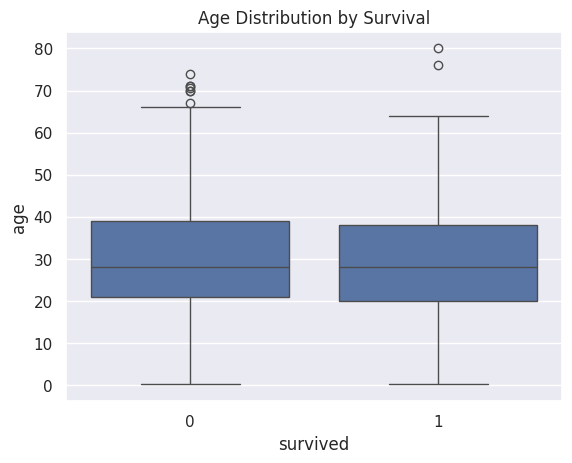

In [1977]:
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()#numerical categories
#survivors vs. non-survivors.

In [1978]:
df.value_counts()

,,,,,,,,,,,,,,count
pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,


Handling missing values

In [1979]:
correlation_matrix = numerical_df.corr()

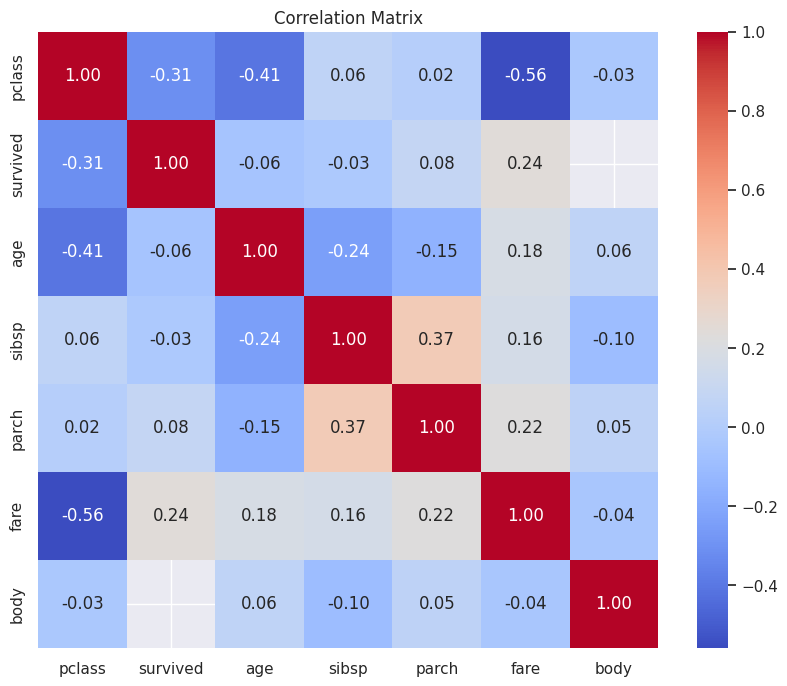

In [1980]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix we can conclude that pclass(-0.31) has high survival rate and also fare and survival has positive correlation(0.24).
-Parch,sibsp and survial(0.08) has weak correlation so we can conlcude tht the familysize had minimal impact on the survival.
-From this we can conclude that loe correlation features(parch,sibsp,age) with surval have minimum impact whereas pclass and fare have significant affect on model performance.(also have multicollinearity)

In [1981]:
df.isnull().sum() #checking for missing values

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


we can see that we have many missing values.

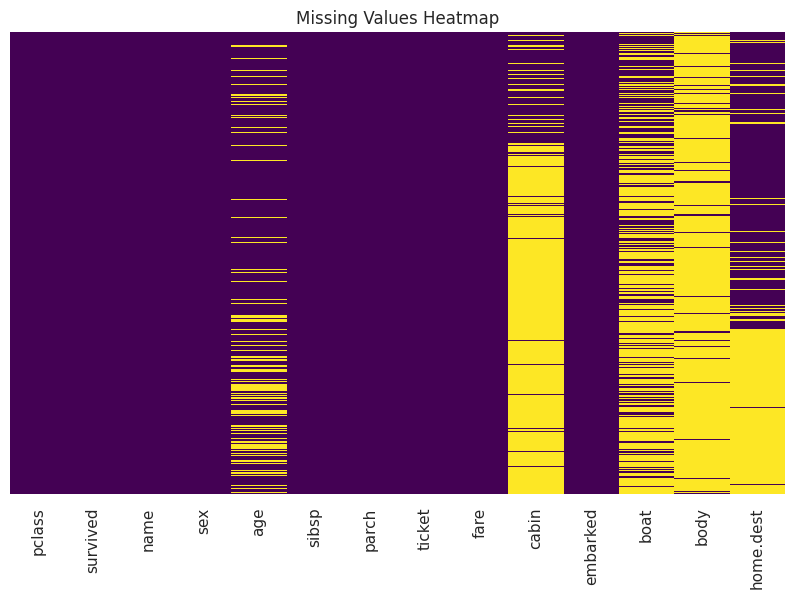

In [1982]:
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [1983]:
df['fare'] = df['fare'].fillna(df['fare'].median())


Best Choice: Technique 1 (Mean or Median Imputation)
Since Fare is skewed, using the median is safer to prevent distortion.

In [1984]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

Best Choice: Technique 1 (Mode Imputation)
Since Embarked is categorical, fill with the most common value (mode).

In [1985]:
df['boat'] = df['boat'].fillna('Unknown')

Best Choice: Technique 2 (-1 or 'Unknown')
Since Boat is categorical, use ‘Unknown’ to indicate missing data.

In [1986]:

df['age'] = df['age'].fillna(df['age'].median())

Since the distribution of age is right-skewed, median imputation is a better choice because Mean imputation can be influenced by outliers or the skewness in the data, leading to an overestimation of the average age.

Median imputation is more robust to skewness and outliers, as it represents the middle value of the dataset.


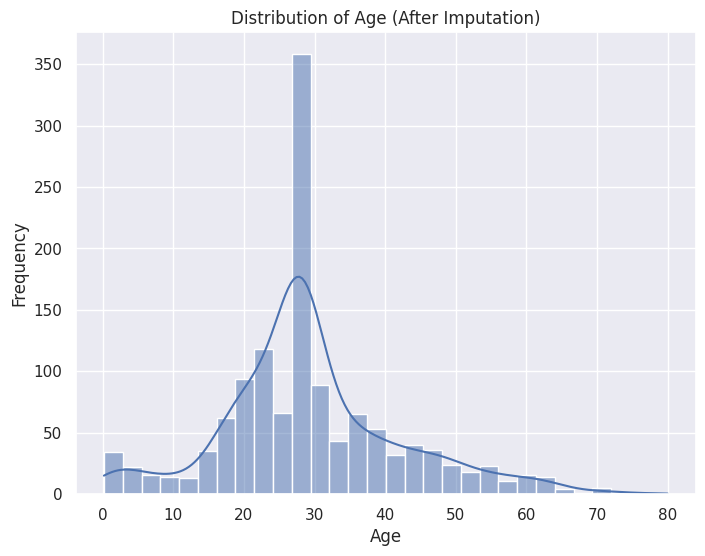

In [1987]:
# Plot the distribution of 'age' after imputation
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age (After Imputation)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [1988]:
# Drop columns with excessive missing values
columns_to_drop = ['cabin', 'body', 'home.dest','ticket','name','boat']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame after dropping columns
df.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S



Body (1188 missing values)
Best Choice: Drop Column
Since most values are missing and this feature is not useful for survival prediction.
Home.Dest (564 missing values)
Best Choice: Drop or Fill with ‘Unknown’

AS well as ticket, name,cabin,Since they dont have any affect on predicting survival rate we drop them

In [1989]:
print(df.columns)

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


In [1990]:
# finding the number of people survived and not survived
df['survived'].value_counts()

,count
survived,
0,809
1,500


In [1991]:

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)
# Display the first few rows of the DataFrame
print(df.head())

   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  female  25.0000      1      2  151.5500        S


In [1992]:
df.shape
# here we removed rows which have missiong values.

(1107, 8)

we can mow see that there no missing values in the data now we can procees with next step.

In [1993]:
df.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0


In [1994]:
# Count the occurrences of each unique value in the "embarked" column
embarked_counts = df['embarked'].value_counts()
print(embarked_counts)


embarked
S    775
C    245
Q     87
Name: count, dtype: int64


In [1995]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
# Feature engineering
#FamilySize: Helps understand group survival trends.#

Data visualizing

In [1996]:
sns.set()

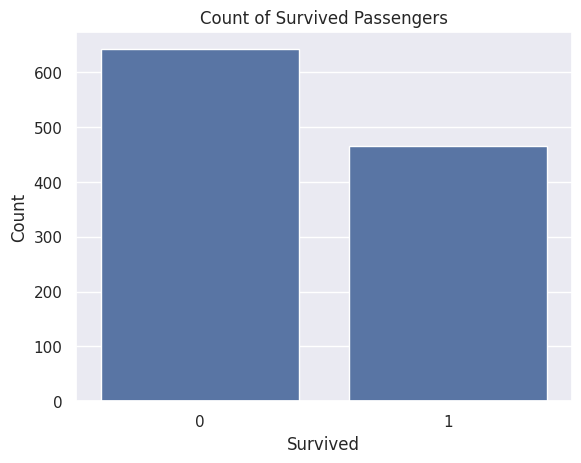

In [1997]:
# making a count plot for "Survived" column
sns.countplot(x='survived', data=df)
plt.title('Count of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

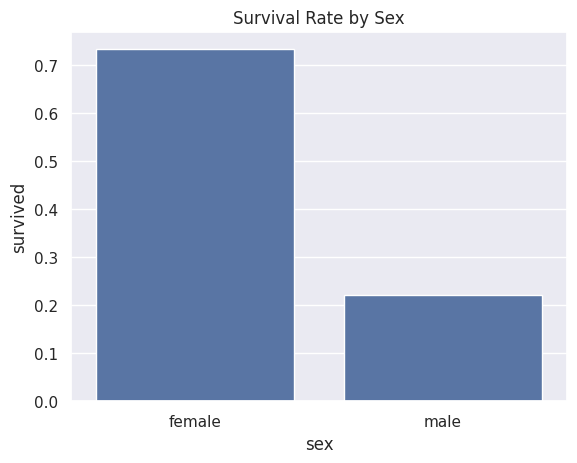

In [1998]:
sns.barplot(x='sex', y='survived', data=df, ci=None)
plt.title('Survival Rate by Sex')
plt.show()#categorial features

In [1999]:
# Count the occurrences of each unique value in the "sex" column
sex_counts = df['sex'].value_counts()
print(sex_counts)
#even though male count is high the survival rate is low in males compared to females

sex
male      677
female    430
Name: count, dtype: int64


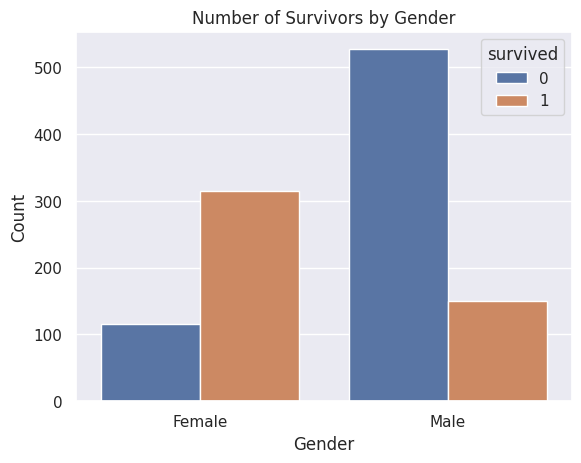

In [2000]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

We can see that even the male rate is higher than female the survival rate of male is lower than female.

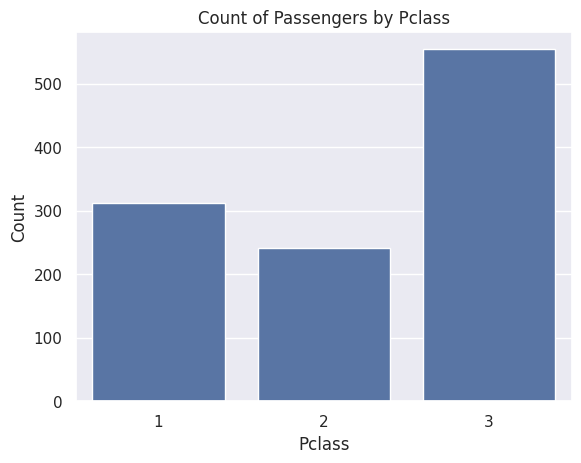

In [2001]:
sns.countplot(x='pclass', data=df)
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

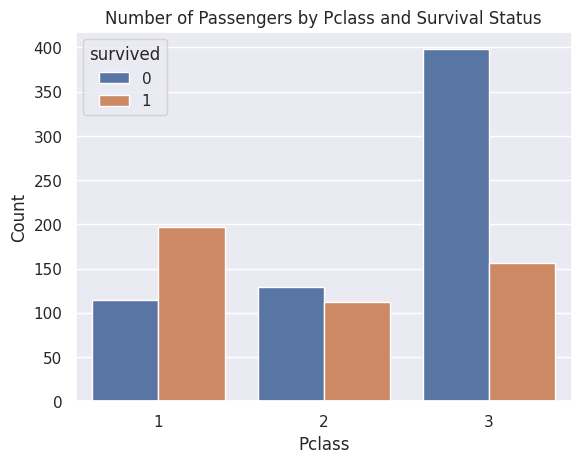

In [2002]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Number of Passengers by Pclass and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

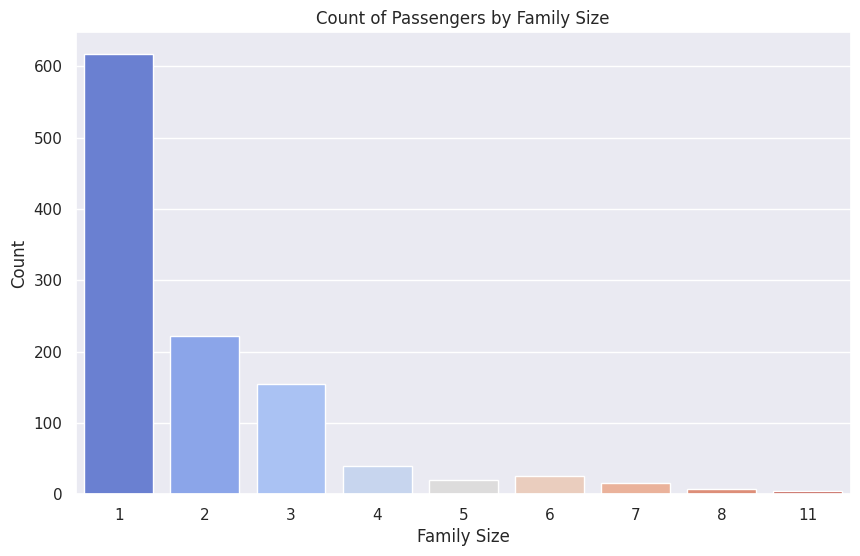

In [2003]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=df, palette='coolwarm')
plt.title('Count of Passengers by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [2004]:
# List of columns to analyze
cols = ['embarked', 'pclass', 'sex','FamilySize']

# Loop through each column and calculate the survival correlation
for col in cols:
    print('Survival Correlation by:', col)
    df2 = df.groupby(col)['survived'].mean().reset_index()
    print(df2)



Survival Correlation by: embarked
  embarked  survived
0        C  0.595918
1        Q  0.321839
2        S  0.375484
Survival Correlation by: pclass
   pclass  survived
0       1  0.631410
1       2  0.464730
2       3  0.281588
Survival Correlation by: sex
      sex  survived
0  female  0.732558
1    male  0.221566
Survival Correlation by: FamilySize
   FamilySize  survived
0           1  0.345219
1           2  0.545045
2           3  0.567742
3           4  0.717949
4           5  0.300000
5           6  0.200000
6           7  0.250000
7           8  0.000000
8          11  0.000000


Hot-encoding

One hot encoding is the process to trnaform the categorical data into a series of binary olumns where each column is represented by unique category.

For example for emabarked we have three categories like c,Q,s each row has binary indicator which spacifies which category it originally belong.

Many ML learning algorithms intepret numerical values as ordered,One-hot encoding ensures that categ oricla variables are treates distictinly and unordered which helps in avoing incorrect assumptions about the categories.By correctly reprensting the categorical data one can improves the perfomance of ML models.

In [2005]:
categorical_features = ['pclass', 'sex', 'embarked']
print(f"\nCategorical features to encode: {categorical_features}")

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform categorical variables
encoded_data = encoder.fit_transform(df[categorical_features])

# Get feature names for encoded variables
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
print(f"\nEncoded feature names: {encoded_feature_names}")

# Create DataFrame with encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

# Display sample of encoded data
print("\nSample of encoded categorical data:")
print(encoded_df.head())

# Merge encoded data with original DataFrame
df_encoded = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Display the transformed dataset
print("\nDataset after encoding categorical variables:")
print(df_encoded.head())


Categorical features to encode: ['pclass', 'sex', 'embarked']

Encoded feature names: ['pclass_2' 'pclass_3' 'sex_male' 'embarked_Q' 'embarked_S']

Sample of encoded categorical data:
   pclass_2  pclass_3  sex_male  embarked_Q  embarked_S
0       0.0       0.0       0.0         0.0         1.0
1       0.0       0.0       1.0         0.0         1.0
2       0.0       0.0       0.0         0.0         1.0
3       0.0       0.0       1.0         0.0         1.0
4       0.0       0.0       0.0         0.0         1.0

Dataset after encoding categorical variables:
   survived      age  sibsp  parch      fare  FamilySize  pclass_2  pclass_3  \
0         1  29.0000      0      0  211.3375           1       0.0       0.0   
1         1   0.9167      1      2  151.5500           4       0.0       0.0   
2         0   2.0000      1      2  151.5500           4       0.0       0.0   
3         0  30.0000      1      2  151.5500           4       0.0       0.0   
4         0  25.0000      1     

Since we want do apply logistic regression it requires numerical inputs to avoid unintended ordinal relationships in categorial variables.
-This is why i converted sex (male and female) to binary,same with the pclass and embarked. hence,each category is now treated as independent.

In [2006]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,FamilySize
0,1,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,4
2,1,0,female,2.0000,1,2,151.5500,S,4
3,1,0,male,30.0000,1,2,151.5500,S,4
4,1,0,female,25.0000,1,2,151.5500,S,4


In [2007]:
df.drop_duplicates(inplace=True) # we are dropping the dupicate data

In [2008]:
numerical_features = ['age', 'fare', 'sibsp', 'parch', 'FamilySize']
print(f"\nNumerical features to scale: {numerical_features}")


Numerical features to scale: ['age', 'fare', 'sibsp', 'parch', 'FamilySize']


In [2009]:
df_standardized = df_encoded.copy()
df_normalized = df_encoded.copy()

# Initialize scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize numerical features
df_standardized[numerical_features] = std_scaler.fit_transform(df_encoded[numerical_features])

# Normalize numerical features
df_normalized[numerical_features] = minmax_scaler.fit_transform(df_encoded[numerical_features])

# Display sample of standardized data
print("\nSample of standardized numerical features:")
print(df_standardized[numerical_features].head())
print("\nSample of normalized numerical features:")
print(df_normalized[numerical_features].head())




Sample of standardized numerical features:
        age      fare     sibsp     parch  FamilySize
0 -0.060648  3.165579 -0.542211 -0.476548   -0.622610
1 -2.092555  2.081540  0.503482  1.712407    1.335428
2 -2.014175  2.081540  0.503482  1.712407    1.335428
3  0.011705  2.081540  0.503482  1.712407    1.335428
4 -0.350059  2.081540  0.503482  1.712407    1.335428

Sample of normalized numerical features:
        age      fare  sibsp     parch  FamilySize
0  0.361169  0.412503  0.000  0.000000         0.0
1  0.009395  0.295806  0.125  0.222222         0.3
2  0.022964  0.295806  0.125  0.222222         0.3
3  0.373695  0.295806  0.125  0.222222         0.3
4  0.311064  0.295806  0.125  0.222222         0.3


Standardization and normalization are the the fundamental techniques which is used in data preprocessing to transform numerical data.

Standardization(z-score normalisation) has mean as 0 and SD as 1. for example for the age we can see -0.060648 this means the age is the average age and SD. Also we can observe that one of fare is 3.1655 which incated that they payes higher than average fare. Same applies for all.It is beneficial when the dataset follows a Gaussian distribution.

In Normalized numerical features all values are scaled between 0 and 1 and all features are comparable. for example for the age we can see that one of the value is 0.3611 is closer to 36% of the maximum age in the dataset.Same applies for all others

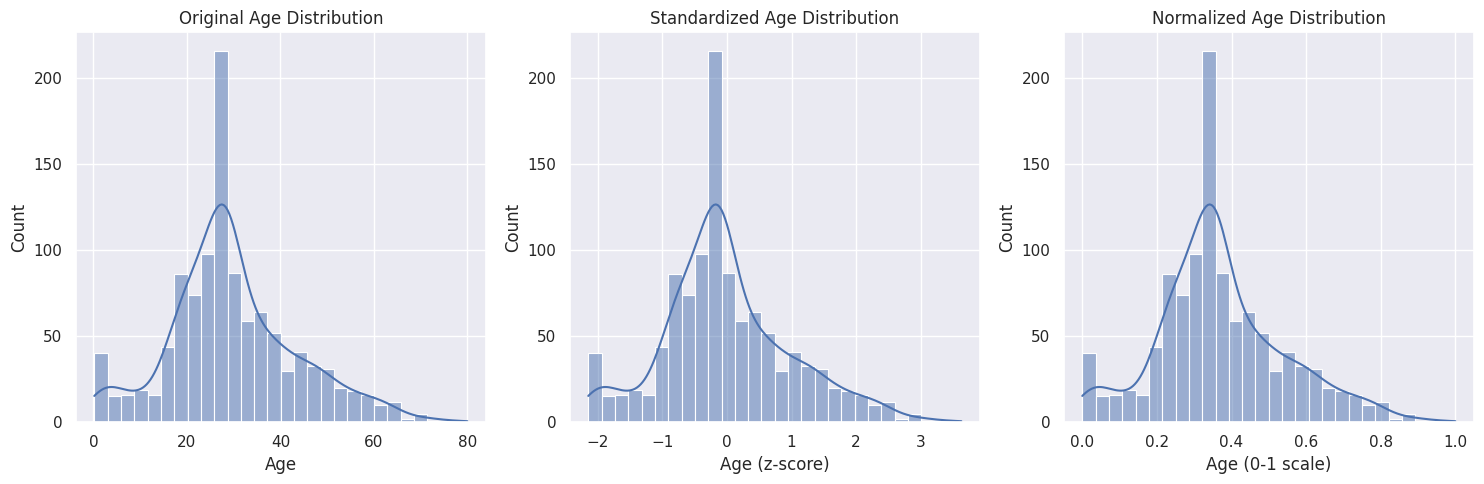

In [2010]:
plt.figure(figsize=(15, 5))

# Original distribution
plt.subplot(1, 3, 1)
sns.histplot(df_encoded['age'], kde=True)
plt.title('Original Age Distribution')
plt.xlabel('Age')

# Standardized distribution
plt.subplot(1, 3, 2)
sns.histplot(df_standardized['age'], kde=True)
plt.title('Standardized Age Distribution')
plt.xlabel('Age (z-score)')

# Normalized distribution
plt.subplot(1, 3, 3)
sns.histplot(df_normalized['age'], kde=True)
plt.title('Normalized Age Distribution')
plt.xlabel('Age (0-1 scale)')

plt.tight_layout()
plt.show()

In [2011]:
df_final = df_standardized.copy()


we are considering standardized numerical values for this dataset .Since, we are using  logistic regression.Data follows a normal distribution or contains extreme values.
Here fare have extreme values.

In overall,this distributes all the features equally,reduces the impact of outliers and increases the efficency of the model.

Splitting the dataset

In [2012]:
X = df_final.drop('survived', axis=1)
y = df_final['survived']

# Print class distribution before splitting
print("\nClass distribution before splitting:")
print(y.value_counts())
print(f"Class distribution percentage: {y.value_counts(normalize=True) * 100}")

# Split data into training and others (60% train, 40% others)
X_train, X_others, y_train, y_others = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Split others into validation and test sets (20% validation, 20% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_others, y_others, test_size=0.5, random_state=42, stratify=y_others
)

# Verify the split ratios and stratification
print("\nData splitting results:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in training set:")
print(y_train.value_counts())
print(f"Percentage: {y_train.value_counts(normalize=True) * 100}")

print("\nClass distribution in validation set:")
print(y_val.value_counts())
print(f"Percentage: {y_val.value_counts(normalize=True) * 100}")

print("\nClass distribution in test set:")
print(y_test.value_counts())
print(f"Percentage: {y_test.value_counts(normalize=True) * 100}")



Class distribution before splitting:
survived
0    642
1    465
Name: count, dtype: int64
Class distribution percentage: survived
0    57.99458
1    42.00542
Name: proportion, dtype: float64

Data splitting results:
Training set: 664 samples (60.0%)
Validation set: 221 samples (20.0%)
Test set: 222 samples (20.1%)

Class distribution in training set:
survived
0    385
1    279
Name: count, dtype: int64
Percentage: survived
0    57.981928
1    42.018072
Name: proportion, dtype: float64

Class distribution in validation set:
survived
0    128
1     93
Name: count, dtype: int64
Percentage: survived
0    57.918552
1    42.081448
Name: proportion, dtype: float64

Class distribution in test set:
survived
0    129
1     93
Name: count, dtype: int64
Percentage: survived
0    58.108108
1    41.891892
Name: proportion, dtype: float64


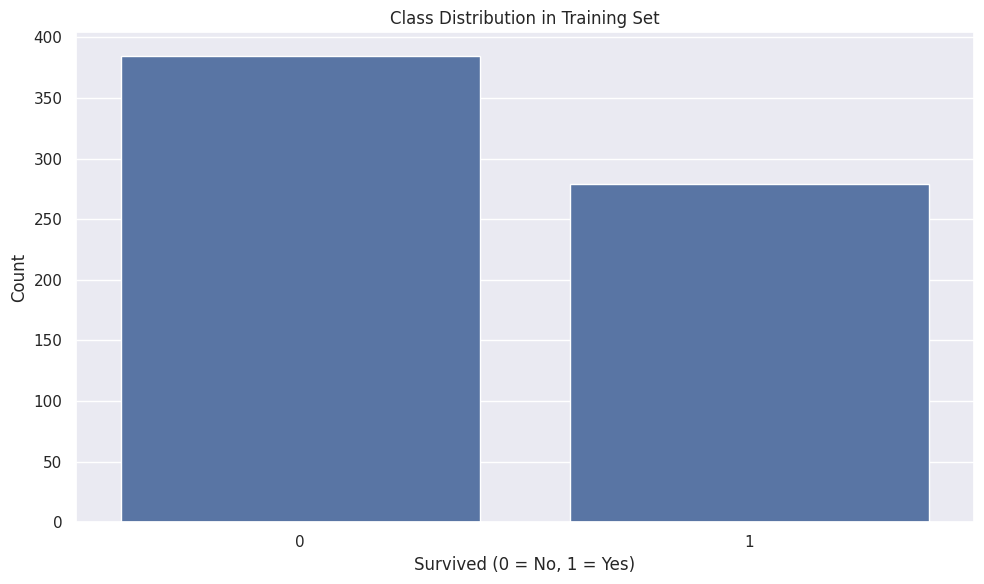

In [2013]:
# Visualize class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

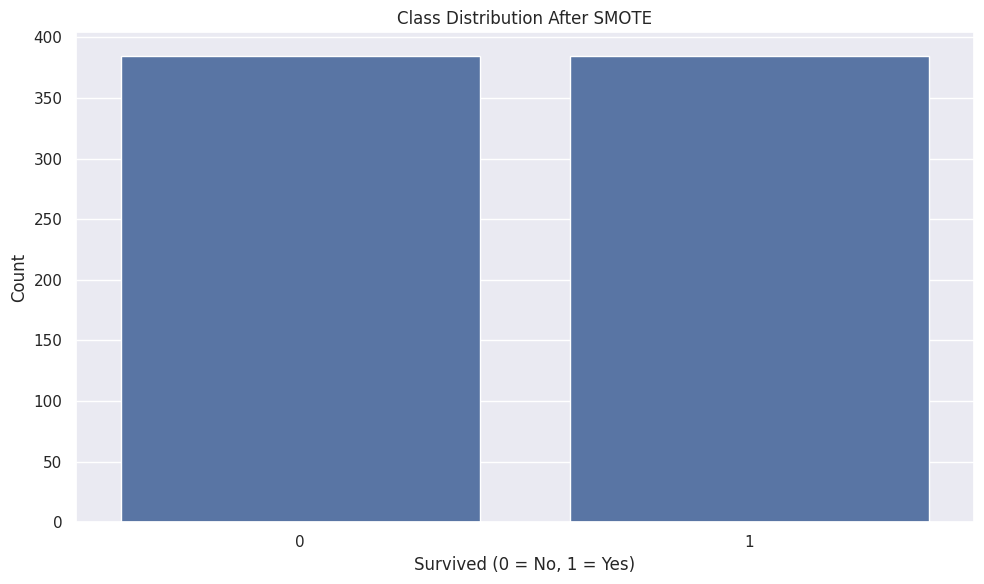

In [2014]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


We'll use SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. SMOTE generates synthetic samples for the minority class, thus balancing the class distribution. we can clearly see that in the graphs above.

In [2015]:
print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print(f"Percentage: {pd.Series(y_train_balanced).value_counts(normalize=True) * 100}")
print(f"Training set shape after SMOTE: {X_train_balanced.shape}")


Class distribution after applying SMOTE:
survived
1    385
0    385
Name: count, dtype: int64
Percentage: survived
1    50.0
0    50.0
Name: proportion, dtype: float64
Training set shape after SMOTE: (770, 10)


We can see that before SMOTE the dataset is imbalanced after SMote the data set is more balanced.Balancing the class distribution helps the model learn equally from both classes, leading to better generalization and improved performance metrics such as accuracy, precision, recall, and F1-score and also reduces the Model's bias towards the majority class which ensures more accurate results.

In [2016]:
var_threshold = VarianceThreshold(threshold=0.01)
X_train_var = var_threshold.fit_transform(X_train_balanced)
X_val_var = var_threshold.transform(X_val)
X_test_var = var_threshold.transform(X_test)

# Get the feature names after variance thresholding
selected_features_mask = var_threshold.get_support()
selected_features = X_train_balanced.columns[selected_features_mask].tolist()

print(f"\nFeatures after variance thresholding: {len(selected_features)}")
print(f"Removed {X_train_balanced.shape[1] - len(selected_features)} low variance features")
print(f"Remaining features: {selected_features}")



Features after variance thresholding: 10
Removed 0 low variance features
Remaining features: ['age', 'sibsp', 'parch', 'fare', 'FamilySize', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S']


In [2017]:
remaining_features_df = pd.DataFrame(X_train_var, columns=selected_features)
correlation_matrix = remaining_features_df.corr().abs()

# Identify highly correlated features
highly_correlated_pairs = []
upper_triangle = np.triu(correlation_matrix, k=1)
upper_triangle_df = pd.DataFrame(upper_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns) # Convert upper_triangle to DataFrame

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if upper_triangle_df.iloc[i, j] > 0.8: # Use .iloc on the DataFrame
            highly_correlated_pairs.append(
                (correlation_matrix.columns[i],
                 correlation_matrix.columns[j],
                 upper_triangle_df.iloc[i, j]) # Use .iloc on the DataFrame
            )
# Display highly correlated features
if highly_correlated_pairs:
    print("\nHighly correlated feature pairs (correlation > 0.8):")
    for feature1, feature2, correlation in highly_correlated_pairs:
        print(f"{feature1} and {feature2}: {correlation:.4f}")
else:
    print("\nNo highly correlated feature pairs found (correlation > 0.8)")

# Remove one feature from each highly correlated pair
features_to_drop = []
if highly_correlated_pairs:
    for feature1, feature2, _ in highly_correlated_pairs:
        # Keep feature1, drop feature2
        if feature2 not in features_to_drop:
            features_to_drop.append(feature2)

    # Get final selected features
    final_features = [f for f in selected_features if f not in features_to_drop]
    print(f"\nFeatures dropped due to high correlation: {features_to_drop}")
    print(f"Final number of features: {len(final_features)}")
    print(f"Final features: {final_features}")
else:
    final_features = selected_features


Highly correlated feature pairs (correlation > 0.8):
sibsp and FamilySize: 0.8411
parch and FamilySize: 0.8156

Features dropped due to high correlation: ['FamilySize']
Final number of features: 9
Final features: ['age', 'sibsp', 'parch', 'fare', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S']


Feature selection involves eliminating low variance features and highly correlated features to improve model performance and interpretability.

In [2018]:
# Convert to DataFrame again with final features
X_train_final = pd.DataFrame(X_train_var, columns=selected_features)
X_val_final = pd.DataFrame(X_val_var, columns=selected_features)
X_test_final = pd.DataFrame(X_test_var, columns=selected_features)

if features_to_drop:
    X_train_final = X_train_final.drop(columns=features_to_drop)
    X_val_final = X_val_final.drop(columns=features_to_drop)
    X_test_final = X_test_final.drop(columns=features_to_drop)

Oversampling techniques such as SMOTE need to be used to trained set because if performed prior to splitting the dataset will result in leakage in test data and validation data. This makes the performance metrics of the model (e.g., accuracy, precision, recall) trustworthy and that the model generalizes well to new data.

Feature selection should be performed after splitting the dataset in order to avoid introducing bias.
Removing features with low variance or correlated features from the overall dataset can lead to the model learning patterns on the test and validation sets in error, causing overfitting.
This helps develop a robust model that generalizes well for new, unseen data. By performing feature selection upon the training set, the process mimics the true scenario in which the model is provided new data after having been trained.


In [2019]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_final, y_train_balanced)

# Make predictions on validation set
y_val_pred = logreg.predict(X_val_final)
y_val_pred_proba = logreg.predict_proba(X_val_final)[:, 1]

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.7783


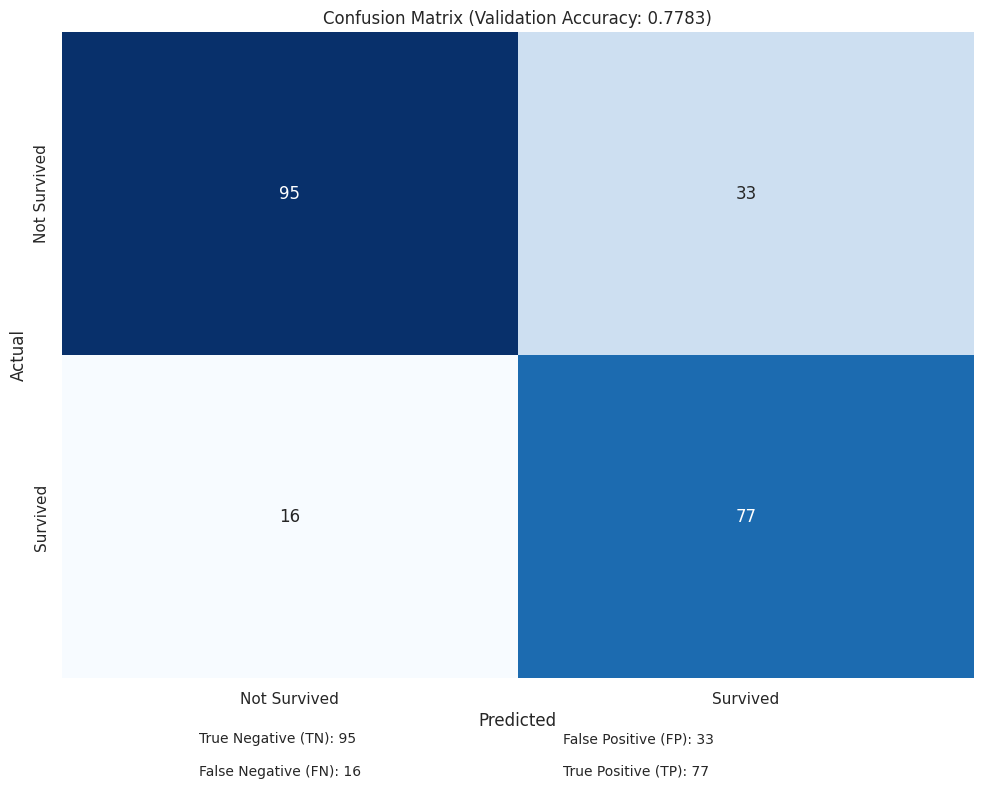

In [2020]:
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Create visually appealing confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Not Survived', 'Survived'],
           yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Validation Accuracy: {val_accuracy:.4f})')

# Add text annotations for clarity
tn, fp, fn, tp = conf_matrix.ravel()
plt.text(0.15, -0.1, f"True Negative (TN): {tn}", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.55, -0.1, f"False Positive (FP): {fp}", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.15, -0.15, f"False Negative (FN): {fn}", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.55, -0.15, f"True Positive (TP): {tp}", transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       128
           1       0.70      0.83      0.76        93

    accuracy                           0.78       221
   macro avg       0.78      0.79      0.78       221
weighted avg       0.79      0.78      0.78       221



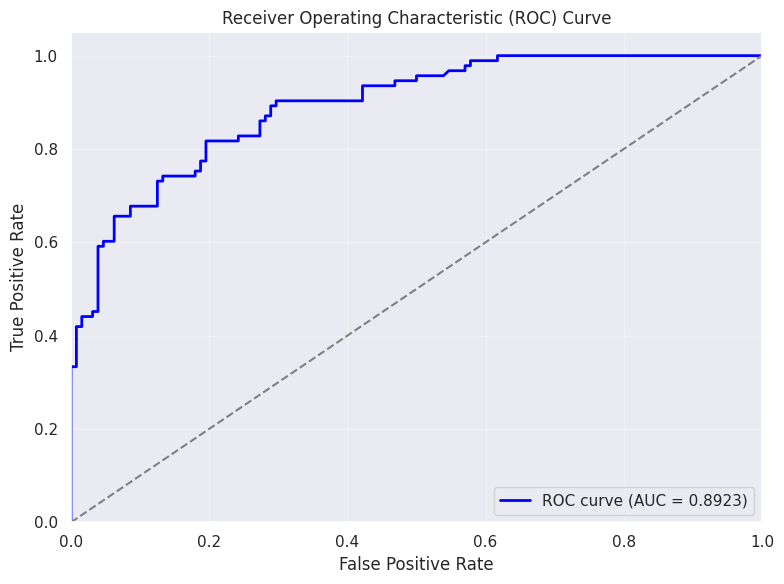

In [2021]:
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
auc = roc_auc_score(y_val, y_val_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The model's overall accuracy is 78%, i.e., it correctly predicts the outcome for 78% of the validation set cases.

Class 0 (did not survive) has precision = 0.86, recall = 0.74, and F1-score = 0.79.

Class 1 (survived) has precision = 0.70, recall = 0.83, and F1-score = 0.76.

Macro and weighted averages provide an even representation of the model's performance across all the classes.

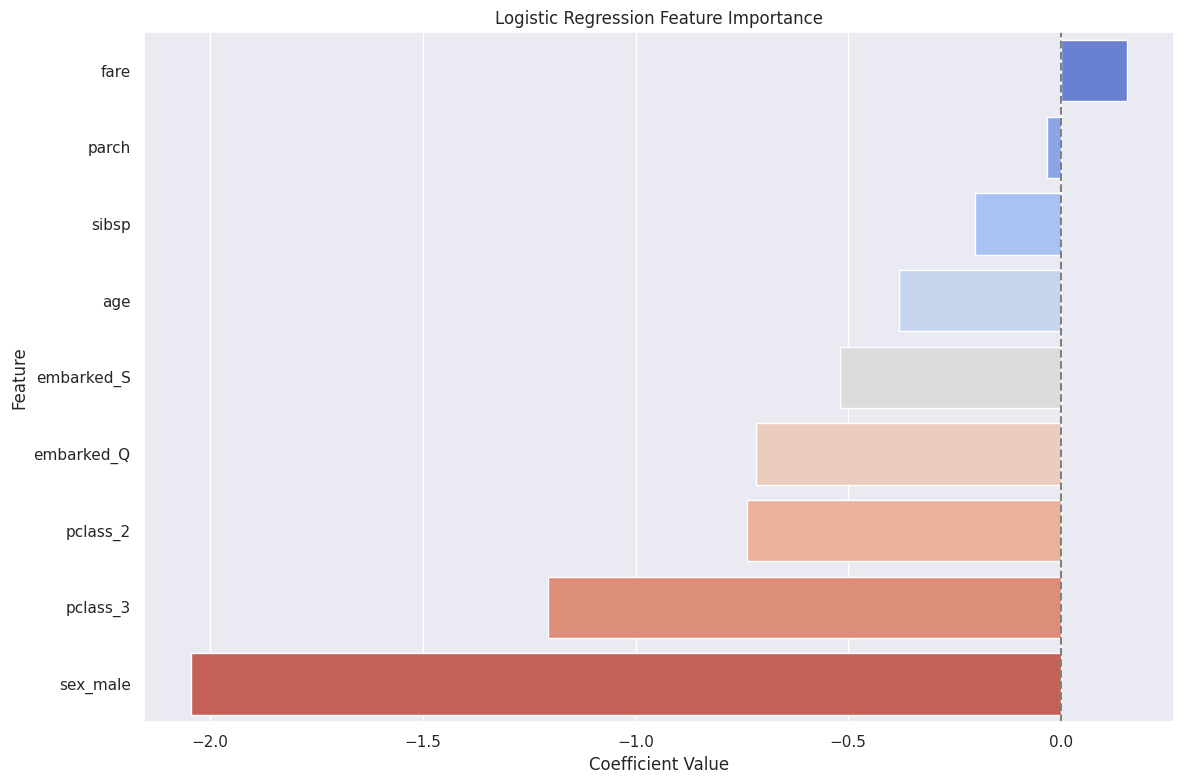


Model Performance Summary:
Validation Accuracy: 0.7783
AUC Score: 0.8923

Top 5 Positive Predictors for Survival:
      Feature  Coefficient
3        fare     0.155637
2       parch    -0.031697
1       sibsp    -0.203099
0         age    -0.379930
8  embarked_S    -0.518505

Top 5 Negative Predictors for Survival:
      Feature  Coefficient
8  embarked_S    -0.518505
7  embarked_Q    -0.716915
4    pclass_2    -0.737548
5    pclass_3    -1.206995
6    sex_male    -2.045778


In [2022]:
# Feature importance visualization
coef_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': logreg.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Feature Importance')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nModel Performance Summary:")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nTop 5 Positive Predictors for Survival:")
print(coef_df.head(5))
print("\nTop 5 Negative Predictors for Survival:")
print(coef_df.tail(5))

In [2023]:
# Final test set evaluation
y_test_pred = logreg.predict(X_test_final)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.7613
